In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import mylibrary.nnlib as tnn
import matplotlib

(400, 2) (400, 1)


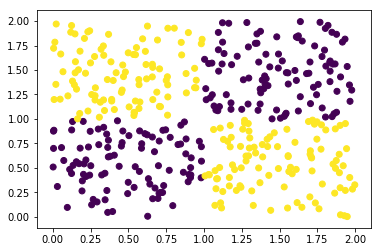

In [2]:
T = 1.
F = 0.

xxx = np.array([[F, F],
      [F, T],
      [T, F],
      [T, T],])
yyy = np.array([[F],[T],[T],[F]])

x = []
y = []
n_data = 400
for i in range(n_data):
    index = np.random.randint(low=0, high=4)
    xx = xxx[index] + np.random.uniform(low=0., high=1, size=xxx[0].size)
#     xx = xxx[index] + np.random.normal(loc=0., scale=0.21, size=xxx[0].size)
    x.append(xx)
    y.append(yyy[index])
x, y = np.array(x), np.array(y)
print(x.shape, y.shape)
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1))

In [3]:
def inrange(X, break0, break1): #if x is after
    xmsk1 = X >= break0
    xmsk2 = X < break1
    xmsk = np.bitwise_and(xmsk1, xmsk2)
    xs = xmsk #*X
    return xs

In [4]:
def linear_interpolation(X, break_x, break_y):
    x,y = break_x, break_y
    n = len(break_x)
    Y = np.zeros_like(X)
    for i in range(n-1):
        mask = inrange(X, break_x[i], break_x[i+1])
        Y_ = (y[i+1] - y[i])/(x[i+1] - x[i])*(X - x[i]) + y[i]
        Y = Y + Y_*mask
    return Y

In [5]:
def backward(X, dY, break_x, break_y):
    x,y = break_x, break_y
    n = len(break_x)
    Y = np.zeros((n, X.shape[0]))
    inranges = np.zeros((n-1, X.shape[0]))
    consts = np.zeros_like(inranges)
    
    for i in range(n-1):
        inranges[i] = inrange(X, break_x[i], break_x[i+1])
            
    for i in range(n-1):
        consts[i] = ((X-x[i])/(x[i+1] - x[i]))
    
    Y[0] = (-1* consts[0] +1)*inranges[0]
    Y[-1] = consts[-1]*inranges[-1]
    for i in range(1, n-1):
            a = consts[i-1]*inranges[i-1]
            b = (-1* consts[i] +1)*inranges[i]
            Y[i] = a+b
    Y = Y*dY
    ny = np.count_nonzero(inranges, axis=1)
    Y = Y.mean(axis=1)
    return Y

In [6]:
def backward2(X, dY, break_x, break_y):
    x,y = break_x, break_y
    n = len(x)
    XX = np.zeros((n, X.shape[0]))
    inranges = np.zeros((n-1, X.shape[0]))
    consts = np.zeros_like(inranges)
    
    for i in range(n-1):
        inranges[i] = inrange(X, x[i], x[i+1])
            
    for i in range(n-1):
        consts[i] = ((y[i+1]-y[i])/(x[i+1] - x[i])**2)
    
    XX[0] = consts[0]*(X - x[1])*inranges[0]
    XX[-1] = -1*consts[-1]*(X - x[-2])*inranges[-1]
    for i in range(1, n-1):
            a = -1*consts[i-1]*(X - x[i-1])*inranges[i-1]
            b = consts[i]*(X - x[i+1])*inranges[i]
            XX[i] = a+b
    XX = XX*dY
#     nx = np.count_nonzero(inranges, axis=1)
    XX = XX.mean(axis=1)
    return XX

In [7]:
def backward3(X, dY, break_x, break_y):
    x,y = break_x, break_y
    n = len(break_x)
    Y = np.zeros_like(X)
    
    for i in range(n-1):
        Y = Y + (y[i+1] - y[i])/(x[i+1] - x[i])*inrange(X, break_x[i], break_x[i+1])
    
    Y = Y*dY
    return Y

In [8]:
def error_piecewise(X, dY, break_x, break_y):
    x,y = break_x, break_y
    n = len(x)
    XX = np.zeros((n, X.shape[0]))
    dYs = np.zeros((n-1, X.shape[0]))
    for i in range(n-1):
        dYs[i] = dY*inrange(X, x[i], x[i+1])
    dYerr = (dYs**2).mean(axis=1)
    return dYerr

In [9]:
colors = ['r', 'y', 'g', 'b']

### Neural Network

_______________________
epoch 0
Loss 0.6791102974758875


_______________________
epoch 10
Loss 0.6618563676014222


_______________________
epoch 20
Loss 0.641933989065975


_______________________
epoch 30
Loss 0.6238568956653974


_______________________
epoch 40
Loss 0.6114213855886731


_______________________
epoch 50
Loss 0.6005529861690045


_______________________
epoch 60
Loss 0.589002009901127


_______________________
epoch 70
Loss 0.5812815600329462


_______________________
epoch 80
Loss 0.5714269824761675


_______________________
epoch 90
Loss 0.5590860067920371


_______________________
epoch 100
Loss 0.5302083069352084


_______________________
epoch 110
Loss 0.5132224822372082


_______________________
epoch 120
Loss 0.4930401816998464


_______________________
epoch 130
Loss 0.4681302908104439


_______________________
epoch 140
Loss 0.4291052037455723


_______________________
epoch 150
Loss 0.4007208036303138


_______________________
epoch 160
Loss 0.388144904714

TclError: this isn't a Tk application

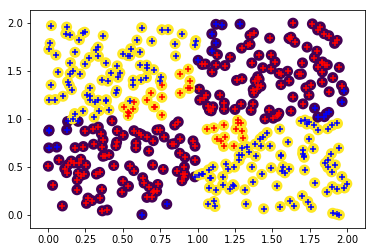

In [10]:
optimizer = tnn.Adam()
logisti11 = tnn.NonLinearLayer(2, 1,activation=tnn.LeakyRelu(), optimizer=optimizer)
nlinear11 = tnn.NonLinearLayer(1, 3,activation=tnn.LeakyRelu(), optimizer=optimizer)
logisti12 = tnn.NonLinearLayer(3, 1,activation=tnn.Sigmoid(), optimizer=optimizer)
logistic1 = tnn.AutoForm()
logistic1.collect_global_layers()

%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.ion()
fig.show()
fig.canvas.draw()

for step in range(10000):
    a1 = logistic1.forward(x)
    loss = tnn.CrossEntropyBinary.loss(a1, y)
    dy = tnn.CrossEntropyBinary.del_loss(a1, y)
    
    dx = logistic1.backward(dy)
    logistic1.update()
    
    if step % 10 == 0:

        print('_______________________')
        print("epoch", step)
        print("Loss", loss)
        out = (a1>0.5).astype(int)

        ax.clear()
        plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
        plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))
        fig.canvas.draw()
        
        plt.pause(0.01)
        print("\n")
        if loss < 0.0025:
            print('fitted to our expectation')
            plt.pause(50)
            break

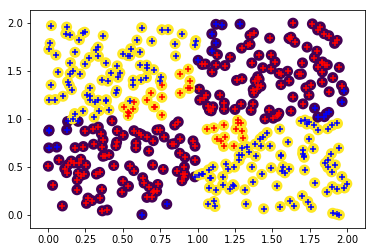

In [11]:
%matplotlib inline
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

### XOR gate with spline regression

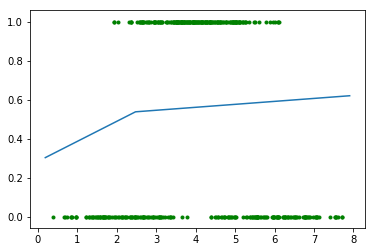

In [12]:
lr=0.1
linear = tnn.LinearLayer(2,1, optimizer=tnn.SGD(lr))
x_ = linear.forward(x)

n_breaks = 3
parmx = list(np.sort(np.random.uniform(x_.min(), x_.max(), size=(n_breaks-2))))
parmx = np.array([x_.min()-0.2]+parmx+[x_.max()+0.2])
parmy = np.sort(np.random.uniform(y.min(), y.max(), size=(n_breaks)))

%matplotlib inline
plt.scatter(x_, y, marker='.', color='g')
plt.plot(parmx, parmy)

array([[1.51796433],
       [2.5264185 ]])

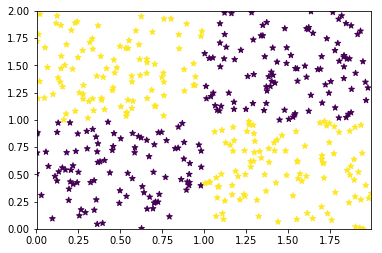

In [13]:
wr, br = linear.weights, linear.bias
x0pt = np.array([x.min(), x.max()])
x1pt = -(x0pt * wr[0][0] + br)/wr[1][0]

plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), marker='*')
plt.plot(x0pt, x1pt)
plt.xlim(x.min(), x.max())
plt.ylim(x.min(), x.max())
wr

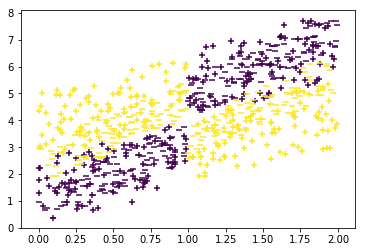

In [14]:
plt.scatter(x[:,0], x_, marker='+',c=y.reshape(-1))
plt.scatter(x[:,1], x_, marker='_',c=y.reshape(-1))

_______________________
Steps 0
Error 0.245867841664287
parmx (3,)


_______________________
Steps 10
Error 0.24107683290648765
parmx (3,)


_______________________
Steps 20
Error 0.23687082863210002
parmx (3,)


_______________________
Steps 30
Error 0.23306665983135857
parmx (3,)


_______________________
Steps 40
Error 0.22954460955715864
parmx (3,)


_______________________
Steps 50
Error 0.22620824478602053
parmx (3,)


_______________________
Steps 60
Error 0.22303109913850278
parmx (3,)


_______________________
Steps 70
Error 0.21992772083173676
parmx (3,)


_______________________
Steps 80
Error 0.21690967876793027
parmx (3,)


_______________________
Steps 90
Error 0.21387922578516094
parmx (3,)


_______________________
Steps 100
Error 0.21088938469179638
parmx (3,)


_______________________
Steps 110
Error 0.20790907194135272
parmx (3,)


_______________________
Steps 120
Error 0.20492879125467098
parmx (3,)


_______________________
Steps 130
Error 0.20195805797681415
parm



_______________________
Steps 1150
Error 0.1260786531307619
parmx (3,)


_______________________
Steps 1160
Error 0.12607379119525366
parmx (3,)


_______________________
Steps 1170
Error 0.12606924787820392
parmx (3,)


_______________________
Steps 1180
Error 0.12606500071220014
parmx (3,)


_______________________
Steps 1190
Error 0.1260610297502702
parmx (3,)


_______________________
Steps 1200
Error 0.12605731664004652
parmx (3,)


_______________________
Steps 1210
Error 0.12605384431068425
parmx (3,)


_______________________
Steps 1220
Error 0.12605061470201942
parmx (3,)


_______________________
Steps 1230
Error 0.12604764926506629
parmx (3,)


_______________________
Steps 1240
Error 0.12604491113938127
parmx (3,)


_______________________
Steps 1250
Error 0.12604235434730826
parmx (3,)


_______________________
Steps 1260
Error 0.12603996106948429
parmx (3,)


_______________________
Steps 1270
Error 0.1260377200439983
parmx (3,)


_______________________
Steps 1280
Erro

TclError: this isn't a Tk application

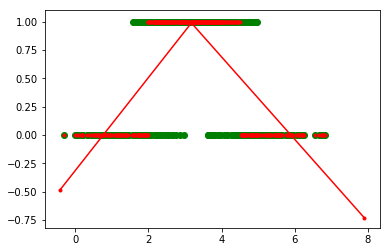

In [15]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
y_ = y.reshape(-1)
for step in range(10000):
    x_ = linear.forward(x).reshape(-1)
    Y = linear_interpolation(x_, parmx, parmy)
    dy = Y-y_
    dparmy = backward(x_, dy, parmx, parmy)
    dparmx = backward2(x_, dy, parmx, parmy)
    dx_ = backward3(x_, dy, parmx, parmy)
    dx = linear.backward(dx_.reshape(-1,1)).reshape(-1)
    
#     dparmy[0] /= lr
#     dparmy[-1] /= lr
    dparmx[0] = 0. if parmx[0]<x_.min()-0.1 else parmx[0] - x_.min() +0.1
    dparmx[-1] = 0. if parmx[-1]>x_.max()+0.1 else parmx[-1] - x_.max() -0.1

    parmy = parmy - dparmy * lr # update
    parmx = parmx - dparmx * lr
    linear.update()
    
    # sorting the points for everything :D
    sortindx = np.argsort(parmx)
    parmx = parmx[sortindx]
    parmy = parmy[sortindx]
    
    if step % 100 == 0:
        # postprocessing the splines
        # removing ones which are very close to each other
        parmx_grad = np.gradient(parmx)
        clipmask = np.abs(parmx_grad) > 1e-2
        parmx = parmx[clipmask]
        parmy = parmy[clipmask]
        
        # removing the ones which are on same line
        triangle = np.ones_like(parmx)
        for i in range(len(parmx)-2):
            triangle[i+1] = 0.5*np.abs(
                (parmx[i] - parmx[i+2])*(parmy[i+1] - parmy[i])-
                (parmx[i] - parmx[i+1])*(parmy[i+2] - parmy[i]))
        mergemask = triangle > 1e-2
        parmx = parmx[mergemask]
        parmy = parmy[mergemask]
        
        # adding units where the 
#         for _ in range(len(parmx), n_breaks):
        if len(parmx)< n_breaks:
            Y = linear_interpolation(x_, parmx, parmy)
            dyerr = error_piecewise(x_, Y-y_, parmx, parmy)
            index = np.argmax(dyerr)
            newpx = (parmx[index] + parmx[index+1])/2.
            newpy = (parmy[index] + parmy[index+1])/2.
            # adding new interpolation points
            parmx = np.append(parmx, newpx)
            parmy = np.append(parmy, newpy)
            # sorting the points for plotting
            sortindx = np.argsort(parmx)
            parmx = parmx[sortindx]
            parmy = parmy[sortindx]
        
        
    if step % 10 == 0:
            
        error = (dy**2).mean()
        
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        print("parmx", parmx.shape)
        
        
        ax.clear()
        plt.scatter(x_, y, marker='o', color='g')
        plt.plot(parmx, parmy, marker='.', color='r')
        x_ = linear.forward(x).reshape(-1)
        Y = linear_interpolation(x_, parmx, parmy)
        out = (Y>0.5).astype(int)
        plt.scatter(x_, out, marker='.', color='r')
        

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

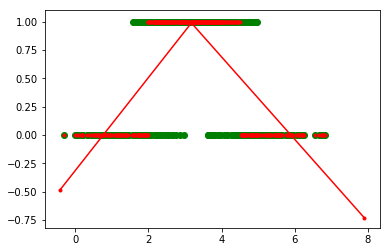

In [16]:
%matplotlib inline

plt.scatter(x_, y, marker='o', color='g')
plt.plot(parmx, parmy, marker='.', color='r')
x_ = linear.forward(x).reshape(-1)
Y = linear_interpolation(x_, parmx, parmy)
out = (Y>0.5).astype(int)
plt.scatter(x_, out, marker='.', color='r')

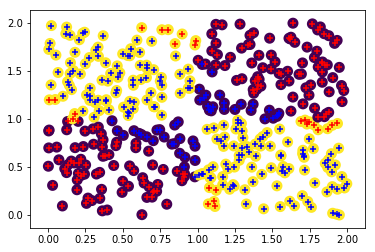

In [17]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

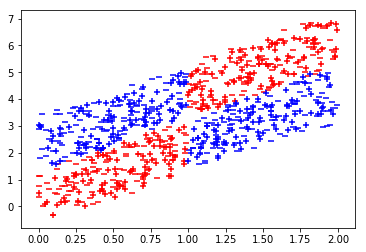

In [18]:
plt.scatter(x[:,0], x_, marker='_',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], x_, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
# plt.scatter(x[:,0], x_, marker='_',c=out.reshape(-1))
# plt.scatter(x[:,1], x_, marker='+',c=out.reshape(-1))

### To fit the data we need another projection--->prediction

In [129]:
n_breaks1 = 7
n_breaks2 = 7
lr=0.03

linear = tnn.LinearLayer(2,2, optimizer=tnn.SGD(lr))
x_ = linear.forward(x)
x1, x2 = x_[:, 0], x_[:, 1]

parmx1 = list(np.sort(np.random.uniform(x1.min(), x1.max(), size=(n_breaks1-2))))
parmx1 = np.array([x1.min()-0.2]+parmx1+[x1.max()+0.2])
parmy1 = np.sort(np.random.uniform(y.min(), y.max(), size=(n_breaks1)))
print(parmx1)
print(parmy1)
print()
parmx2 = list(np.sort(np.random.uniform(x2.min(), x2.max(), size=(n_breaks1-2))))
parmx2 = np.array([x2.min()-0.2]+parmx2+[x2.max()+0.2])
parmy2 = np.sort(np.random.uniform(y.min(), y.max(), size=(n_breaks2)))
print(parmx2)
print(parmy2)

[-0.18478516  0.0566593   0.07571522  0.11482818  0.19279266  0.26269634
  0.50268163]
[0.13033398 0.40819204 0.47455253 0.48284721 0.55912113 0.79643344
 0.96217177]

[-1.81408794 -1.51440173 -1.095667   -0.84592605 -0.6531058  -0.23092744
  0.11833505]
[0.07001991 0.20325711 0.25280254 0.36903402 0.56124896 0.56367186
 0.59293731]


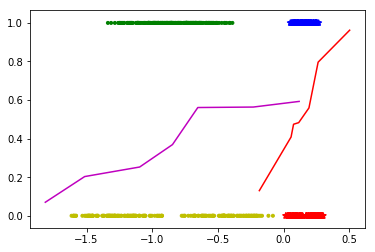

In [130]:
%matplotlib inline
plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))

plt.plot(parmx1, parmy1, color='r')
plt.plot(parmx2, parmy2, color='m')

_______________________
Steps 0
Error 0.4769543693807684
parmx (3,)


_______________________
Steps 100
Error 0.18952604831940043
parmx (3,)


_______________________
Steps 200
Error 0.15012065756391088
parmx (3,)


_______________________
Steps 300
Error 0.13404635434073725
parmx (3,)


_______________________
Steps 400
Error 0.12429526179620694
parmx (3,)


_______________________
Steps 500
Error 0.12060630582234935
parmx (3,)


_______________________
Steps 600
Error 0.11893618883488295
parmx (3,)


_______________________
Steps 700
Error 0.11811254298808609
parmx (3,)


_______________________
Steps 800
Error 0.11771898287996758
parmx (3,)


_______________________
Steps 900
Error 0.11751799193881318
parmx (3,)


_______________________
Steps 1000
Error 0.11740994084713455
parmx (3,)


_______________________
Steps 1100
Error 0.11734872054931454
parmx (3,)


_______________________
Steps 1200
Error 0.11731312927317684
parmx (3,)


_______________________
Steps 1300
Error 0.11729452

TclError: this isn't a Tk application

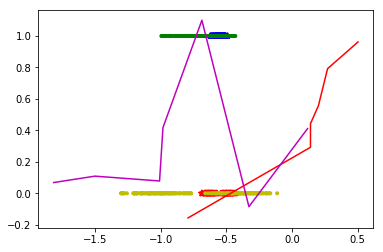

In [131]:
%matplotlib tk
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
plt.ion()
fig.show()
fig.canvas.draw()
y_ = y.reshape(-1)

for step in range(100000):
    x_ = linear.forward(x)
    x1, x2 = x_[:, 0], x_[:, 1]
    
    Y1 = linear_interpolation(x1, parmx1, parmy1)
    Y2 = linear_interpolation(x2, parmx2, parmy2)
    Y = Y1+Y2
    dy = Y-y_
    dy1, dy2 = dy, dy
    
    dparmy1 = backward(x1, dy1, parmx1, parmy1)
    dparmx1 = backward2(x1, dy1, parmx1, parmy1)
    dx_1 = backward3(x1, dy1, parmx1, parmy1)
    
    dparmy2 = backward(x2, dy2, parmx2, parmy2)
    dparmx2 = backward2(x2, dy2, parmx2, parmy2)
    dx_2 = backward3(x2, dy2, parmx2, parmy2)
    
    dx_ = np.c_[dx_1, dx_2]
#     print(dx_.shape)
    dx = linear.backward(dx_)
    
    
#     dparmy[0] /= lr
#     dparmy[-1] /= lr
    dparmx1[0] = 0. if parmx1[0]<x1.min()-0.1 else parmx1[0] - x1.min()+0.1
    dparmx1[-1] = 0. if parmx1[-1]>x1.max()+0.1 else parmx1[-1] - x1.max()-0.1
    dparmx2[0] = 0. if parmx2[0]<x2.min()-0.1 else parmx2[0] - x2.min()+0.1
    dparmx2[-1] = 0. if parmx2[-1]>x2.max()+0.1 else parmx2[-1] - x2.max()-0.1
    
    parmy2 = parmy2 - dparmy2 * lr # update
    parmx2 = parmx2 - dparmx2 * lr
    parmy1 = parmy1 - dparmy1 * lr # update
    parmx1 = parmx1 - dparmx1 * lr
    linear.update()
    
    # sorting the points for everything :D
    sortindx1 = np.argsort(parmx1)
    parmx1 = parmx1[sortindx1]
    parmy1 = parmy1[sortindx1]
    
    sortindx2 = np.argsort(parmx2)
    parmx2 = parmx2[sortindx2]
    parmy2 = parmy2[sortindx2]
    
#     if step % 100 == 0:
#         # postprocessing the splines
#         # removing ones which are very close to each other
#         parmx_grad = np.gradient(parmx)
#         clipmask = np.abs(parmx_grad) > 1e-2
#         parmx = parmx[clipmask]
#         parmy = parmy[clipmask]
        
#         # removing the ones which are on same line
#         triangle = np.ones_like(parmx)
#         for i in range(len(parmx)-2):
#             triangle[i+1] = 0.5*np.abs(
#                 (parmx[i] - parmx[i+2])*(parmy[i+1] - parmy[i])-
#                 (parmx[i] - parmx[i+1])*(parmy[i+2] - parmy[i]))
#         mergemask = triangle > 1e-2
#         parmx = parmx[mergemask]
#         parmy = parmy[mergemask]
        
#         # adding units where the 
# #         for _ in range(len(parmx), n_breaks):
#         if len(parmx)< n_breaks:
#             Y = linear_interpolation(x_, parmx, parmy)
#             dyerr = error_piecewise(x_, Y-y_, parmx, parmy)
#             index = np.argmax(dyerr)
#             newpx = (parmx[index] + parmx[index+1])/2.
#             newpy = (parmy[index] + parmy[index+1])/2.
#             # adding new interpolation points
#             parmx = np.append(parmx, newpx)
#             parmy = np.append(parmy, newpy)
#             # sorting the points for plotting
#             sortindx = np.argsort(parmx)
#             parmx = parmx[sortindx]
#             parmy = parmy[sortindx]
        
        
    if step % 100 == 0:
            
        error = (dy**2).mean()
        
        print('_______________________')
        print("Steps", step)
        print("Error", error)
        print("parmx", parmx.shape)
        
        
        ax.clear()
        
        x_ = linear.forward(x)
        x1, x2 = x_[:, 0], x_[:, 1]
        Y1 = linear_interpolation(x1, parmx1, parmy1)
        Y2 = linear_interpolation(x2, parmx2, parmy2)
        Y = Y1+Y2
        out = (Y>0.5).astype(int)
#         plt.scatter(x_[:,0], out, marker='.', color='r')
        
        plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
        plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))
        plt.plot(parmx1, parmy1, color='r')
        plt.plot(parmx2, parmy2, color='m')
        

        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            plt.pause(50)
            break

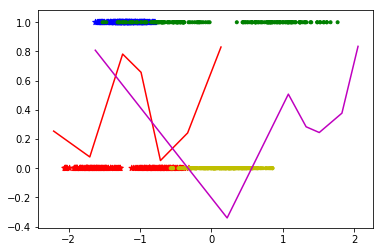

In [127]:
%matplotlib inline
x_ = linear.forward(x)
x1, x2 = x_[:, 0], x_[:, 1]
Y1 = linear_interpolation(x1, parmx1, parmy1)
Y2 = linear_interpolation(x2, parmx2, parmy2)
Y = Y1+Y2
out = (Y>0.5).astype(int)

plt.scatter(x1, y, marker='*', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x2, y, marker='.', c = y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors[1:-1]))
plt.plot(parmx1, parmy1, color='r')
plt.plot(parmx2, parmy2, color='m')

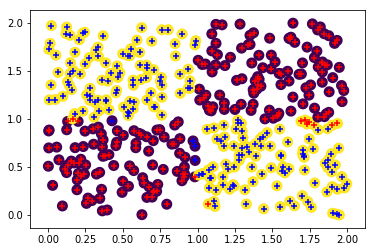

In [128]:
plt.scatter(x[:,0], x[:, 1], c=y.reshape(-1), lw=5)
plt.scatter(x[:,0], x[:, 1], c=out.reshape(-1), marker='+', cmap=matplotlib.colors.ListedColormap(colors))

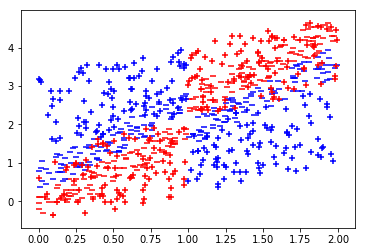

In [108]:
plt.scatter(x[:,0], x2, marker='_',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(x[:,1], x2, marker='+',c=y.reshape(-1),cmap=matplotlib.colors.ListedColormap(colors))
# plt.scatter(x[:,0], x_, marker='_',c=out.reshape(-1))
# plt.scatter(x[:,1], x_, marker='+',c=out.reshape(-1))